# Plotting and Visualization

Making informative visualizations (sometimes called **plots**) is one of the most important tasks in data analysis. 
It may be a part of the exploratory process—for example,
to help identify outliers or needed data transformations, or as a way of generating
ideas for models.

In [133]:
import numpy as np
import pandas as pd
PREVIOUS_MAX_ROWS = pd.options.display.max_rows
pd.options.display.max_rows = 20
pd.options.display.max_colwidth = 80
pd.options.display.max_columns = 20
np.random.seed(12345)
import matplotlib.pyplot as plt
import matplotlib
plt.rc("figure", figsize=(10, 6))
np.set_printoptions(precision=4, suppress=True)

In [134]:
import matplotlib.pyplot as plt

## A Brief matplotlib API Primer

In [135]:
%matplotlib

Using matplotlib backend: module://matplotlib_inline.backend_inline


In [136]:
data = np.arange(10)
data

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

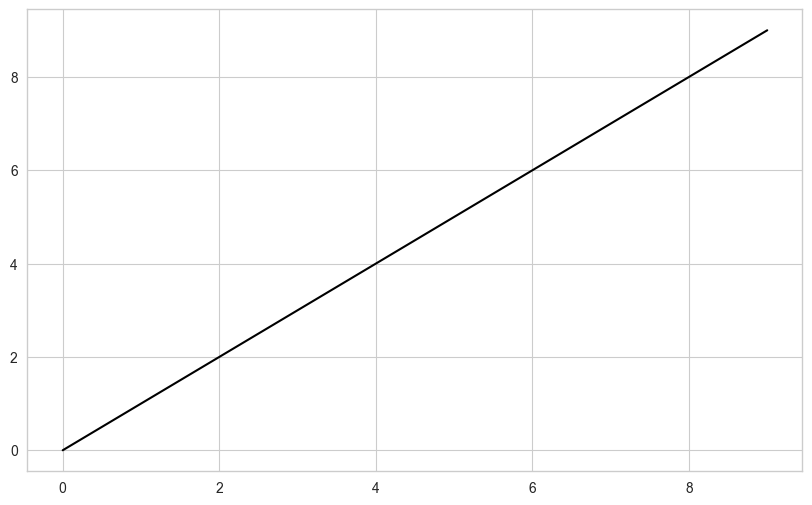

In [137]:
plt.plot(data)

### Figures and Subplots
Plots in matplotlib reside within a Figure object.

`plt.figure` has a number of options; notably, `figsize` will guarantee the figure has a
certain size and aspect ratio if saved to disk.

In [138]:
fig = plt.figure()

<Figure size 1000x600 with 0 Axes>

You have to create one or more **subplots** using `add_subplot`

`fig.add_subplot(2, 2, 1)`

This means that the figure should be 2 × 2 (so up to four plots in total), and we’re
selecting the first of four subplots (numbered from 1)

In [139]:
ax1 = fig.add_subplot(2, 2, 1)

In [140]:
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)

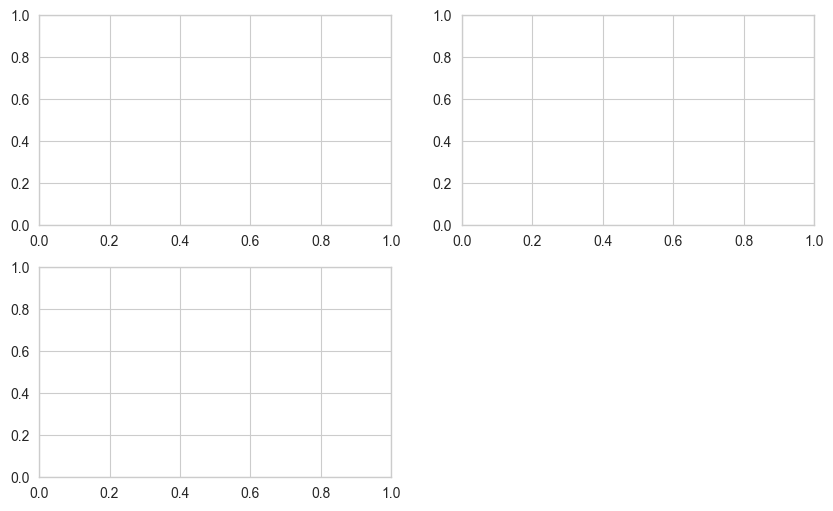

In [141]:
fig

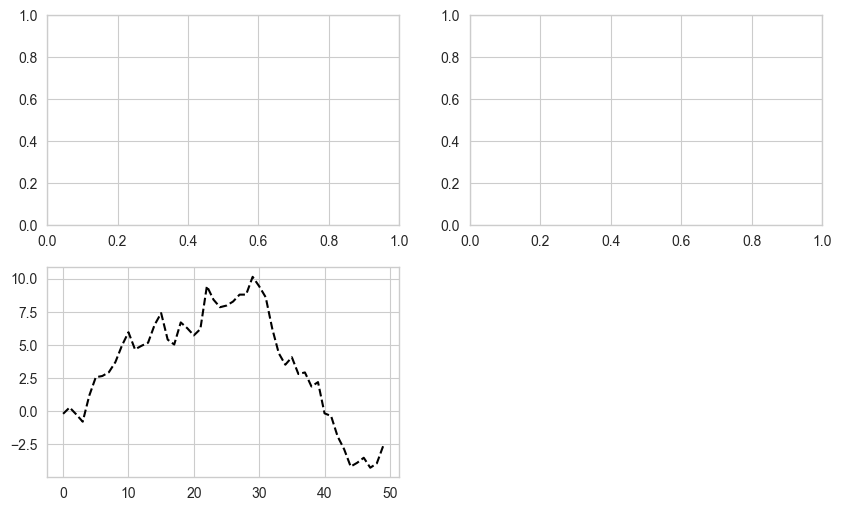

In [142]:
ax3.plot(np.random.standard_normal(50).cumsum(), color="black",
         linestyle="dashed")
fig

In [143]:
# The style option alpha=0.3 sets the transparency of the overlaid plot.
ax1.hist(np.random.standard_normal(100), bins=20, color="black", alpha=0.3);
ax2.scatter(np.arange(30), np.arange(30) + 3 * np.random.standard_normal(30));

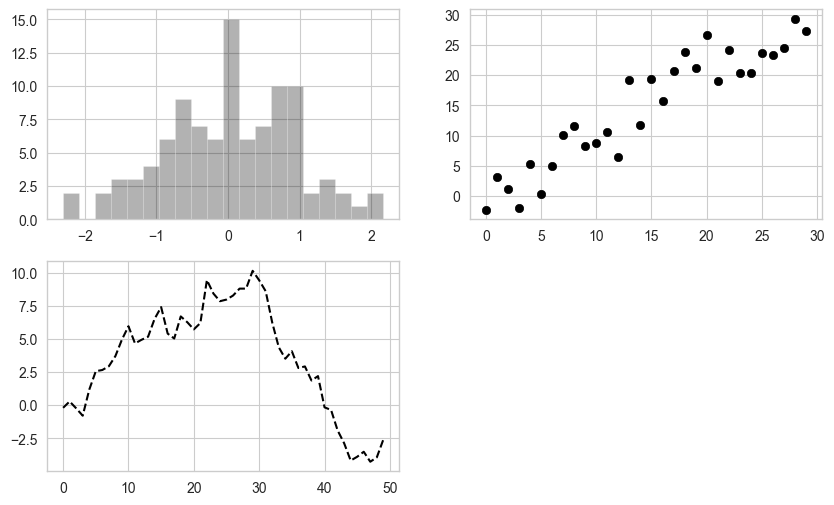

In [144]:
fig


In [145]:
plt.close("all")

To make creating a **grid of subplots** more convenient, matplotlib includes a `plt.subplots` method that creates a new figure and returns a NumPy array containing the created subplot objects

array([[<Axes: >, <Axes: >, <Axes: >],
       [<Axes: >, <Axes: >, <Axes: >]], dtype=object)

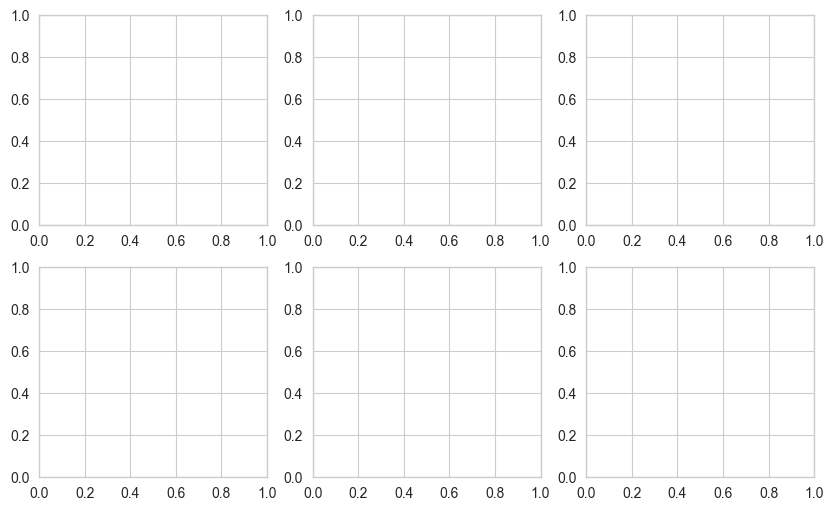

In [146]:
fig, axes = plt.subplots(2, 3)
axes

The axes array can then be indexed like a two-dimensional array; for example,
`axes[0, 1]` refers to the subplot in the top row at the center. You can also indi‐
cate that subplots should have the same x- or y-axis using `sharex` and `sharey`,
respectively. This can be useful when you’re comparing data on the same scale;
otherwise, matplotlib autoscales plot limits independently.

<img src="Img/matplotlib_subplot.png" alt="matplotlib.pyplot.subplots options" title="matplotlib.pyplot.subplots options" />


### Adjusting the spacing around subplots
By default, matplotlib leaves a certain amount of padding around the outside of the
subplots and in spacing between subplots. This spacing is all specified relative to the
height and width of the plot, so that if you resize the plot either programmatically
or manually using the GUI window, the plot will dynamically adjust itself. You can
change the spacing using the `subplots_adjust` method on Figure objects:

`subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=None)`

`wspace` and `hspace` control the percent of the figure width and figure height, respectively, to use as spacing between subplots.

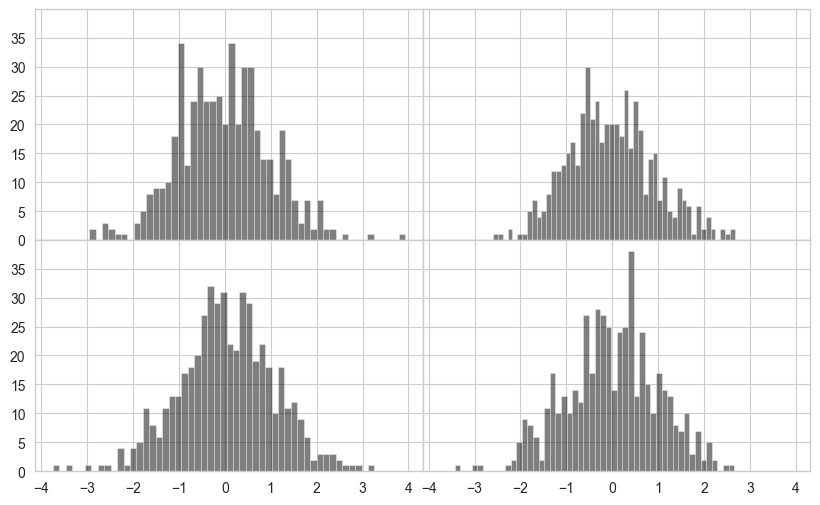

In [147]:
fig, axes = plt.subplots(2, 2, sharex=True, sharey=True)
for i in range(2):
    for j in range(2):
        axes[i, j].hist(np.random.standard_normal(500), bins=50,
                        color="black", alpha=0.5)
        
fig.subplots_adjust(wspace=0, hspace=0)

### Colors, Markers, and Line Styles

matplotlib’s **line plot** function accepts arrays of x and y coordinates and optional
color styling options. For example, to plot x versus y with green dashes, you would
execute:

`ax.plot(x, y, linestyle="--", color="green")`

A number of color names are provided for commonly used colors, but you can use
any color on the spectrum by specifying its hex code (e.g., "#CECECE"). 

You can see some of the supported line styles by looking at the docstring for `plt.plot` (use
`plt.plot?` in IPython or Jupyter). 

Line plots can additionally have **markers** to highlight the actual data points. Since
matplotlib’s plot function creates a continuous line plot, interpolating between
points, it can occasionally be unclear where the points lie. The marker can be
supplied as an additional styling option

In [148]:
plt.plot?

Signature:
plt.plot(
    *args: 'float | ArrayLike | str',
    scalex: 'bool' = True,
    scaley: 'bool' = True,
    data=None,
    **kwargs,
) -> 'list[Line2D]'
Docstring:
Plot y versus x as lines and/or markers.

Call signatures::

    plot([x], y, [fmt], *, data=None, **kwargs)
    plot([x], y, [fmt], [x2], y2, [fmt2], ..., **kwargs)

The coordinates of the points or line nodes are given by *x*, *y*.

The optional parameter *fmt* is a convenient way for defining basic
formatting like color, marker and linestyle. It's a shortcut string
notation described in the *Notes* section below.

>>> plot(x, y)        # plot x and y using default line style and color
>>> plot(x, y, 'bo')  # plot x and y using blue circle markers
>>> plot(y)           # plot y using x as index array 0..N-1
>>> plot(y, 'r+')     # ditto, but with red plusses

You can use `.Line2D` properties as keyword arguments for more
control on the appearance. Line properties and *fmt* can be mixed.
The following two calls yie

In [149]:
fig = plt.figure()

<Figure size 1000x600 with 0 Axes>

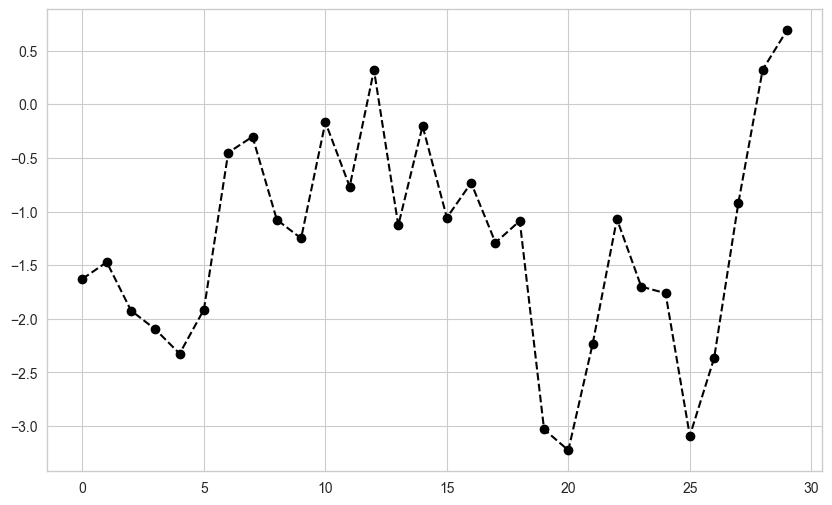

In [150]:
ax = fig.add_subplot()
ax.plot(np.random.standard_normal(30).cumsum(), color="black",
        linestyle="dashed", marker="o");
fig

In [151]:
plt.close("all")

For line plots, you will notice that subsequent points are linearly **interpolated** by
default. This can be altered with the `drawstyle` option

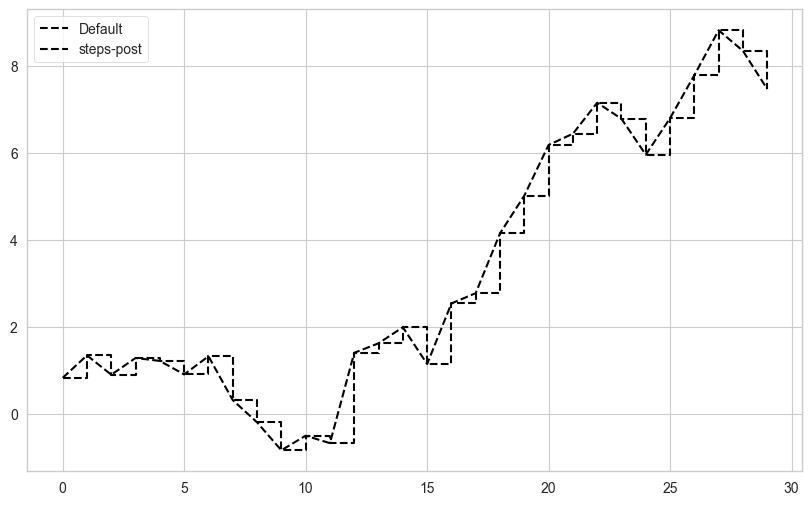

In [152]:
fig = plt.figure()
ax = fig.add_subplot()
data = np.random.standard_normal(30).cumsum()
ax.plot(data, color="black", linestyle="dashed", label="Default");
ax.plot(data, color="black", linestyle="dashed",
        drawstyle="steps-post", label="steps-post");
ax.legend()

### Ticks, Labels, and Legends
Most kinds of plot decorations can be accessed through methods on matplotlib axes
objects. This includes methods like `xlim`, `xticks`, and `xticklabels`. These control the
plot range, tick locations, and tick labels, respectively. They can be used in two ways:

- Called with **no arguments** returns the current parameter value (e.g., ax.xlim()•
returns the current x-axis plotting range)
- Called with **parameters** sets the parameter value (e.g., ax.xlim([0, 10]) sets the x-axis range to 0 to 10)

All such methods act on the active or most recently created AxesSubplot. Each
corresponds to two methods on the subplot object itself; in the case of xlim, these are
ax.get_xlim and ax.set_xlim.

#### Setting the title, axis labels, ticks, and tick labels

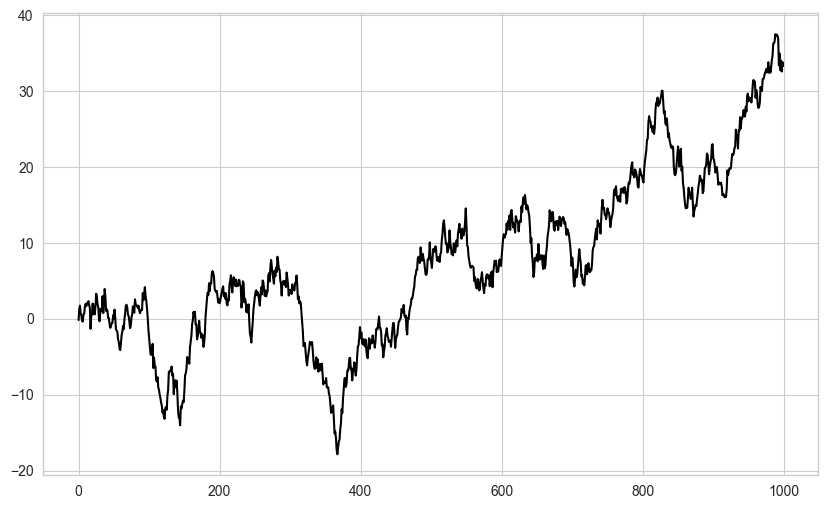

In [153]:
fig, ax = plt.subplots()
ax.plot(np.random.standard_normal(1000).cumsum());

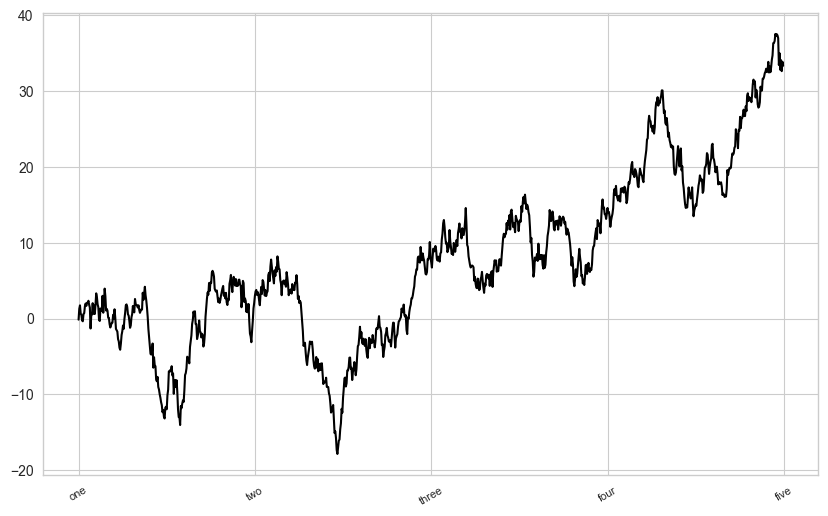

In [154]:
ticks = ax.set_xticks([0, 250, 500, 750, 1000])
labels = ax.set_xticklabels(["one", "two", "three", "four", "five"],
                            rotation=30, fontsize=8)
fig

In [155]:
ax.set_xlabel("Stages")
ax.set_title("My first matplotlib plot")

Text(0.5, 1.0, 'My first matplotlib plot')

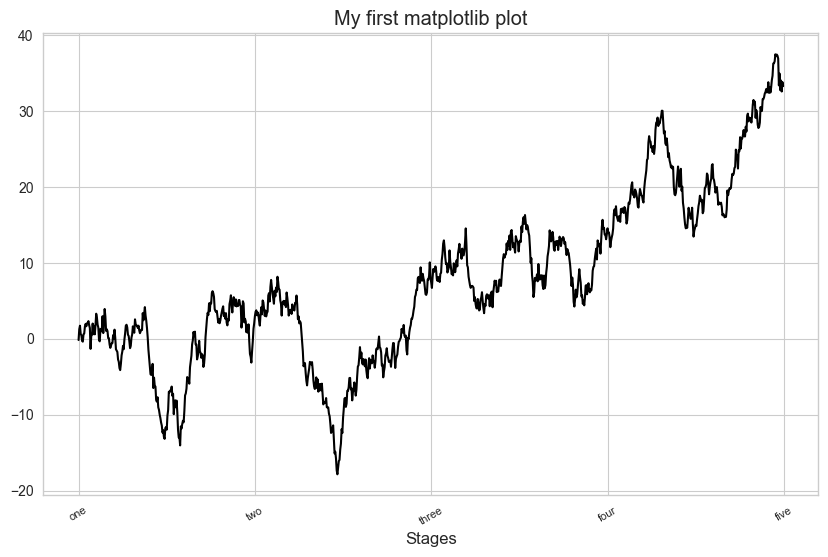

In [156]:
fig

#### Adding legends

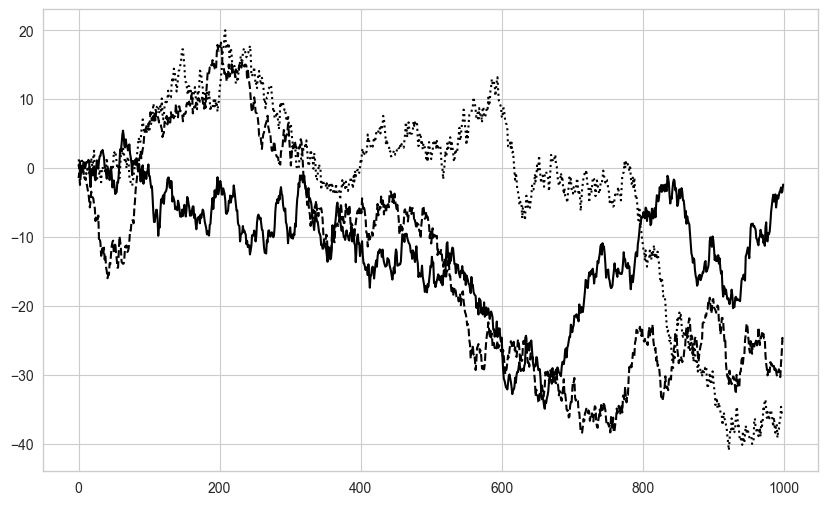

In [157]:
fig, ax = plt.subplots()
ax.plot(np.random.randn(1000).cumsum(), color="black", label="one");
ax.plot(np.random.randn(1000).cumsum(), color="black", linestyle="dashed",
        label="two");
ax.plot(np.random.randn(1000).cumsum(), color="black", linestyle="dotted",
        label="three");

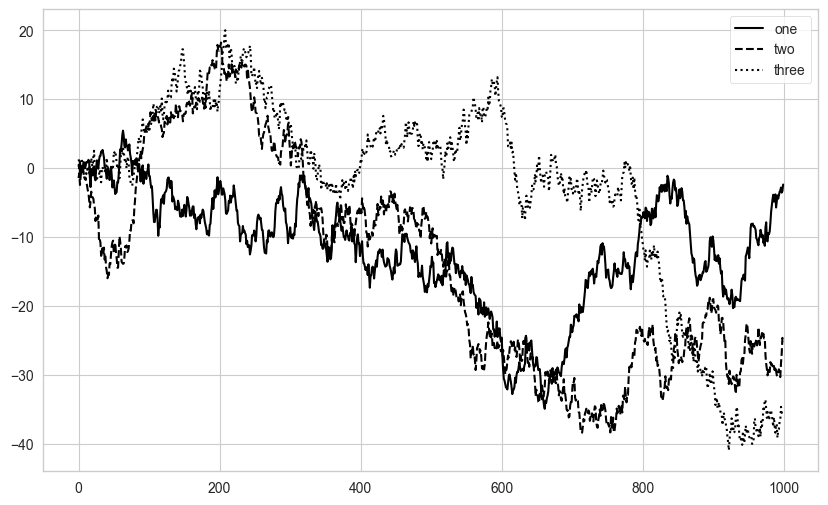

In [158]:
ax.legend()
fig

The legend method has several other choices for the location `loc` argument. See the
docstring (with ax.legend?) for more information.

The `loc` legend option tells matplotlib where to place the plot. The default is **"best"**,
which tries to choose a location that is most out of the way. To exclude one or more
elements from the legend, pass no label or `label="_nolegend_"`

### Annotations and Drawing on a Subplot

In addition to the standard plot types, you may wish to draw your own **plot annotations**, which could consist of text, arrows, or other shapes. You can add annotations and text using the `text`, `arrow`, and `annotate` functions. 

- `text` draws text at given coordinates (x, y) on the plot with optional custom styling:<br>
    `ax.text(x, y, "Hello world!", family="monospace", fontsize=10)`

- `Annotations` can draw both text and arrows arranged appropriately. 

As an example, let’s plot the closing S&P 500 index price since 2007 (obtained from Yahoo! Finance)
and annotate it with some of the important dates from the 2008–2009 financial crisis.

Text(0.5, 1.0, 'Important dates in the 2008-2009 financial crisis')

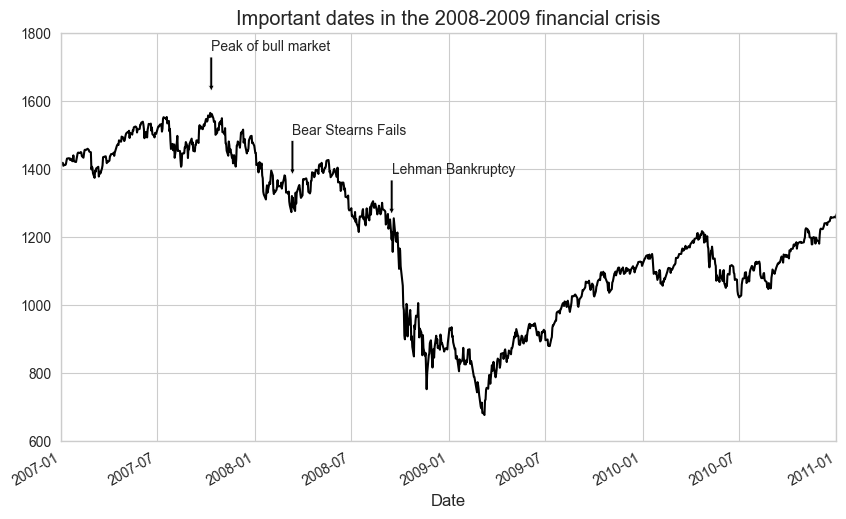

In [159]:
from datetime import datetime

fig, ax = plt.subplots()

data = pd.read_csv("examples/spx.csv", index_col=0, parse_dates=True)
spx = data["SPX"]

spx.plot(ax=ax, color="black")

crisis_data = [
    (datetime(2007, 10, 11), "Peak of bull market"),
    (datetime(2008, 3, 12), "Bear Stearns Fails"),
    (datetime(2008, 9, 15), "Lehman Bankruptcy")
]

for date, label in crisis_data:
    ax.annotate(label, xy=(date, spx.asof(date) + 75),
                xytext=(date, spx.asof(date) + 225),
                arrowprops=dict(facecolor="black", headwidth=4, width=2,
                                headlength=4),
                horizontalalignment="left", verticalalignment="top")

# Zoom in on 2007-2010
ax.set_xlim(["1/1/2007", "1/1/2011"])
ax.set_ylim([600, 1800])

ax.set_title("Important dates in the 2008-2009 financial crisis")


There are a couple of important points to highlight in this plot. 
- The `ax.annotate` method can draw labels at the indicated x and y coordinates. 
- We use the `set_xlim` and `set_ylim` methods to manually set the start and end boundaries for the plot
rather than using matplotlib’s default. 
- Lastly, `ax.set_title` adds a main title to the plot.

Drawing shapes requires some more care. matplotlib has objects that represent many
common shapes, referred to as **patches**. Some of these, like `Rectangle` and `Circle`, are
found in `matplotlib.pyplot`, but the full set is located in `matplotlib.patches`.

To add a shape to a plot, you create the patch object and add it to a subplot `ax` by
passing the patch to `ax.add_patch`

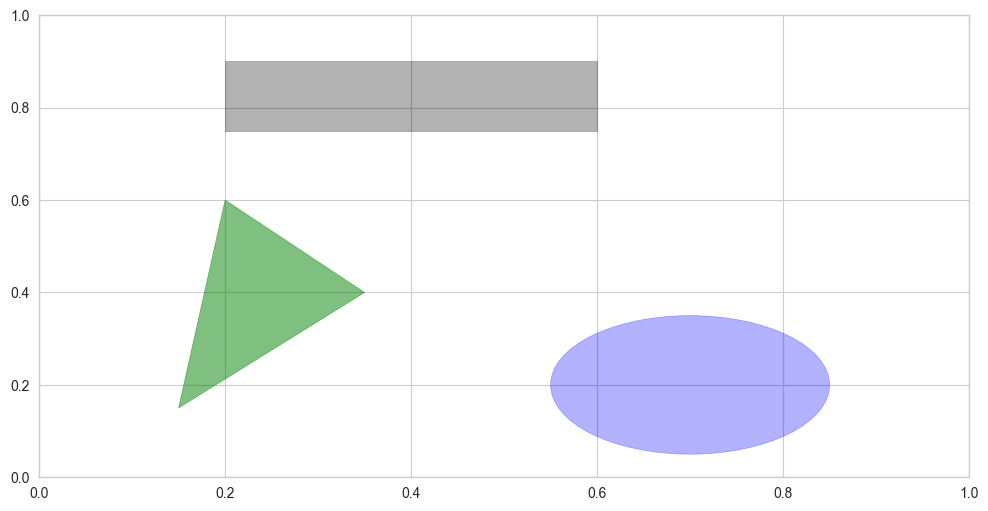

In [160]:
fig, ax = plt.subplots(figsize=(12, 6))

rect = plt.Rectangle((0.2, 0.75), 0.4, 0.15, color="black", alpha=0.3)
circ = plt.Circle((0.7, 0.2), 0.15, color="blue", alpha=0.3)
pgon = plt.Polygon([[0.15, 0.15], [0.35, 0.4], [0.2, 0.6]],
                   color="green", alpha=0.5)

ax.add_patch(rect)
ax.add_patch(circ)
ax.add_patch(pgon)

In [161]:
plt.close("all")

### Saving Plots to File
You can save the active figure to file using the figure object’s `savefig` instance
method. For example, to save an SVG version of a figure, you need only type:

`fig.savefig("figpath.svg")`

The file type is inferred from the file extension. So if you used `.pdf` instead, you
would get a PDF. One important option that I use frequently for publishing graphics
is dpi, which controls the dots-per-inch resolution. To get the same plot as a PNG at
400 DPI, you would do:

`fig.savefig("figpath.png", dpi=400)`

<img src="Img/matplotlib_savefig.png" alt="Some fig.savefig options" title="Some fig.savefig options" />



### matplotlib Configuration

matplotlib comes configured with color schemes and defaults that are geared primarily toward preparing figures for publication. Fortunately, nearly all of the default behavior can be customized via *global* parameters governing figure size, subplot
spacing, colors, font sizes, grid styles, and so on. One way to modify the configuration
programmatically from Python is to use the `rc` method; for example, to set the global
default figure size to be 10 × 10, you could enter:

`plt.rc("figure", figsize=(10, 10))`

All of the current configuration settings are found in the `plt.rcParams` dictionary,
and they can be restored to their default values by calling the `plt.rcdefaults()`
function.

The first argument to `rc` is the component you wish to customize, such as "figure",
"axes", "xtick", "ytick", "grid", "legend", or many others. After that can follow a
sequence of keyword arguments indicating the new parameters. A convenient way to
write down the options in your program is as a dictionary:

`plt.rc("font", family="monospace", weight="bold", size=8)`

For more extensive customization and to see a list of all the options, matplotlib
comes with a configuration file matplotlibrc in the matplotlib/mpl-data directory. If
you customize this file and place it in your home directory titled .matplotlibrc, it will
be loaded each time you use matplotlib.
As we’ll see in the next section, the seaborn package has several built-in plot themes
or styles that use matplotlib’s configuration system internally.

## Plotting with pandas and seaborn
matplotlib can be a fairly low-level tool. You assemble a plot from its base components: the data display (i.e., the type of plot: line, bar, box, scatter, contour, etc.), legend, title, tick labels, and other annotations.

In **pandas**, we may have multiple columns of data, along with row and column labels.
pandas itself has built-in methods that simplify creating visualizations from DataFrame and Series objects. 

Another library is **seaborn**, a high-level statistical graphics
library built on matplotlib. seaborn simplifies creating many common visualization
types.

### Line Plots
Series and DataFrame have a plot attribute for making some basic plot types. By
default, `plot()` makes line plots

<Axes: >

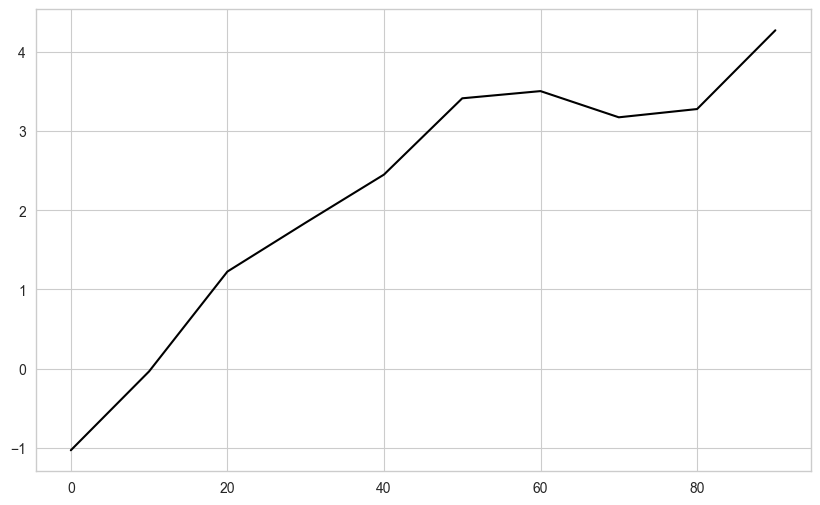

In [162]:
s = pd.Series(np.random.standard_normal(10).cumsum(), index=np.arange(0, 100, 10))
s.plot()

The Series object’s **index** is passed to matplotlib for plotting on the **x-axis**, though
you can disable this by passing `use_index=False`. The x-axis ticks and limits can be
adjusted with the `xticks` and `xlim` options, and the y-axis respectively with yticks and ylim

<img src="Img/pd_series_plot.png" alt="Series.plot method arguments" title="Series.plot method arguments" />


DataFrame’s plot method plots each of its columns as a different line on the same
subplot, creating a legend automatically

<Axes: >

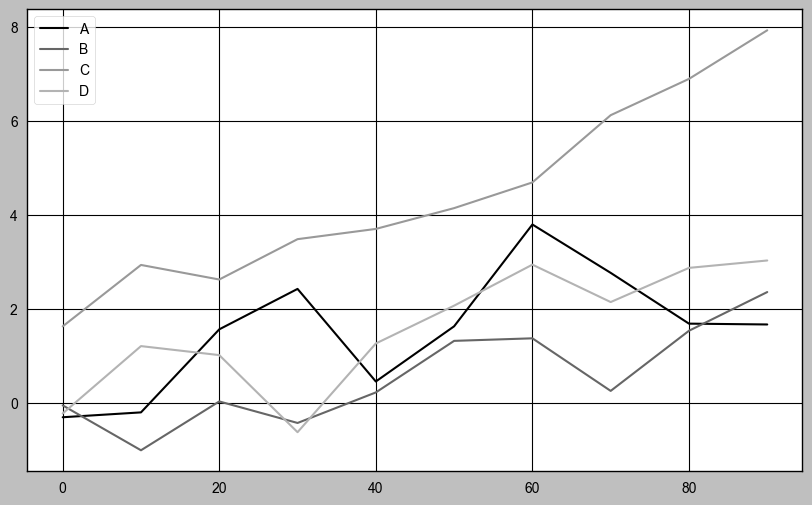

In [163]:
df = pd.DataFrame(np.random.standard_normal((10, 4)).cumsum(0),
                  columns=["A", "B", "C", "D"],
                  index=np.arange(0, 100, 10))
plt.style.use('grayscale')
df.plot()

DataFrame has a number of options allowing some flexibility for how the columns
are handled, for example, whether to plot them all on the same subplot or to create
separate subplots. 

<img src="Img/pd_df_plot.png" alt=" DataFrame-specific plot arguments" title=" DataFrame-specific plot arguments" />


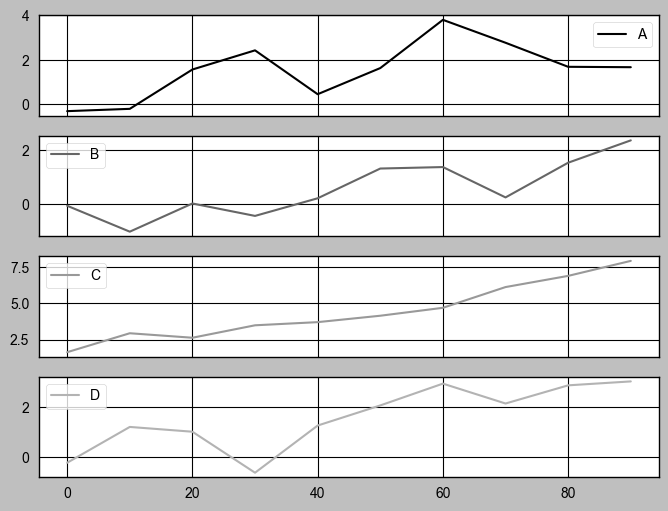

In [164]:
df.plot.line(subplots=True, figsize=(8, 6));

### Bar Plots
The `plot.bar()` and `plot.barh()` make vertical and horizontal bar plots, respectively.<br> 
In this case, the Series or DataFrame **index** will be used as the x (bar) or y (barh) ticks

<Axes: >

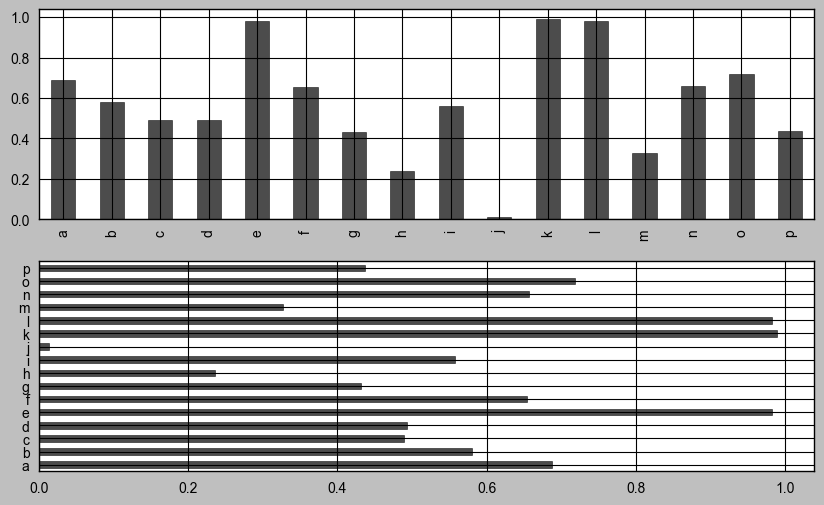

In [165]:
fig, axes = plt.subplots(2, 1)
data = pd.Series(np.random.uniform(size=16), index=list("abcdefghijklmnop"))
data.plot.bar(ax=axes[0], color="black", alpha=0.7)
data.plot.barh(ax=axes[1], color="black", alpha=0.7)

With a DataFrame, bar plots group the values in each row in bars, side by side, for
each value

In [166]:
np.random.seed(12348)

In [167]:
df = pd.DataFrame(np.random.uniform(size=(6, 4)),
                  index=["one", "two", "three", "four", "five", "six"],
                  columns=pd.Index(["A", "B", "C", "D"], name="Genus"))
df

Genus,A,B,C,D
one,0.370670,0.602792,0.229159,0.486744
two,0.420082,0.571653,0.049024,0.880592
three,0.814568,0.277160,0.880316,0.431326
four,0.374020,0.899420,0.460304,0.100843
five,0.433270,0.125107,0.494675,0.961825
six,0.601648,0.478576,0.205690,0.560547


<Axes: >

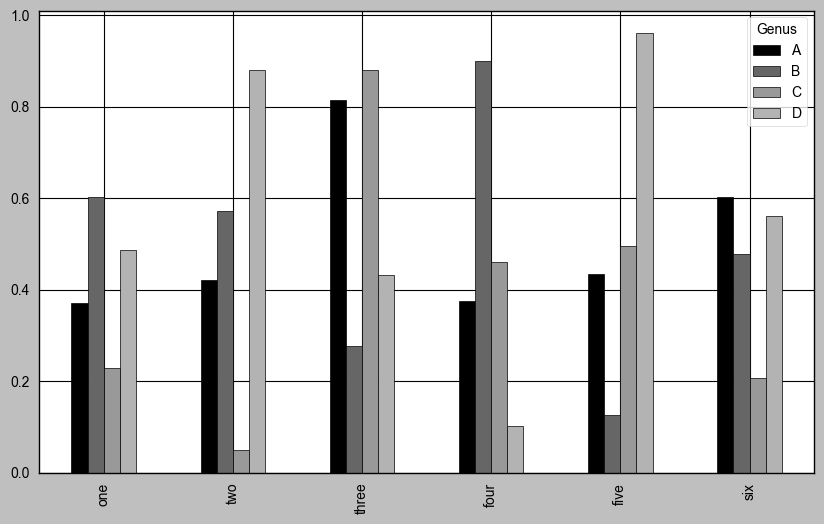

In [168]:
# Note that the name “Genus” on the DataFrame’s columns is used to title the legend
df.plot.bar()

In [169]:
plt.figure()

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Axes: >

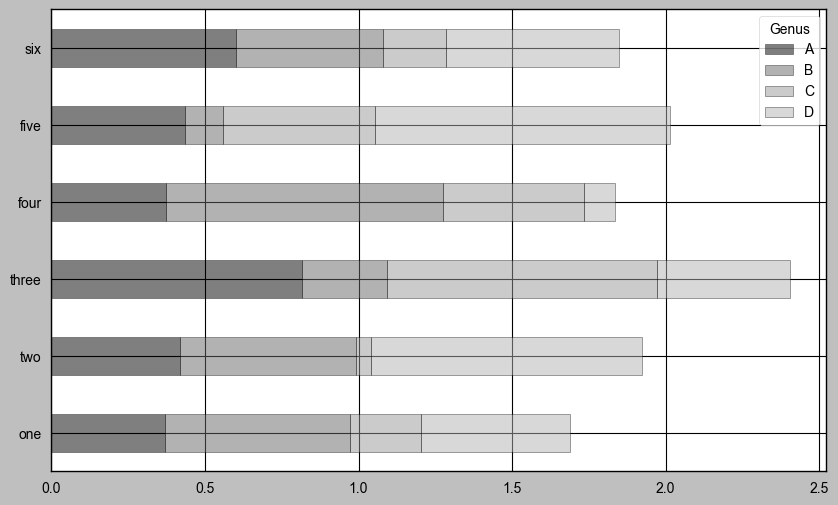

In [170]:
df.plot.barh(stacked=True, alpha=0.5)

In [171]:
plt.close("all")

Let’s have a look at an example dataset about **restaurant tipping**. 

Suppose we wanted
to make a **stacked bar plot** showing the *percentage of data points for each party size
for each day*. 

I load the data using `read_csv` and make a cross-tabulation by day and
party size. The `pandas.crosstab` function is a convenient way to compute a simple
frequency table from two DataFrame columns

In [172]:
tips = pd.read_csv("examples/tips.csv")
tips.head()

,total_bill,tip,smoker,day,time,size
0,16.99,1.01,No,Sun,Dinner,2
1,10.34,1.66,No,Sun,Dinner,3
2,21.01,3.50,No,Sun,Dinner,3
3,23.68,3.31,No,Sun,Dinner,2
4,24.59,3.61,No,Sun,Dinner,4


In [173]:
party_counts = pd.crosstab(tips["day"], tips["size"])
party_counts

size,1,2,3,4,5,6
day,,,,,,
Fri,1,16,1,1,0,0
Sat,2,53,18,13,1,0
Sun,0,39,15,18,3,1
Thur,1,48,4,5,1,3


In [174]:
party_counts = party_counts.reindex(index=["Thur", "Fri", "Sat", "Sun"])
party_counts

size,1,2,3,4,5,6
day,,,,,,
Thur,1,48,4,5,1,3
Fri,1,16,1,1,0,0
Sat,2,53,18,13,1,0
Sun,0,39,15,18,3,1


In [175]:
# Since there are not many one- and six-person parties, I remove them here
party_counts = party_counts.loc[:, 2:5]
party_counts

size,2,3,4,5
day,,,,
Thur,48,4,5,1
Fri,16,1,1,0
Sat,53,18,13,1
Sun,39,15,18,3


In [176]:
party_counts.sum(axis="columns")

day
Thur    58
Fri     18
Sat     85
Sun     75
dtype: int64

In [177]:
# Normalize to sum to 1 (each row)
party_pcts = party_counts.div(party_counts.sum(axis="columns"),
                              axis="index")
party_pcts

size,2,3,4,5
day,,,,
Thur,0.827586,0.068966,0.086207,0.017241
Fri,0.888889,0.055556,0.055556,0.000000
Sat,0.623529,0.211765,0.152941,0.011765
Sun,0.520000,0.200000,0.240000,0.040000


<Axes: xlabel='day'>

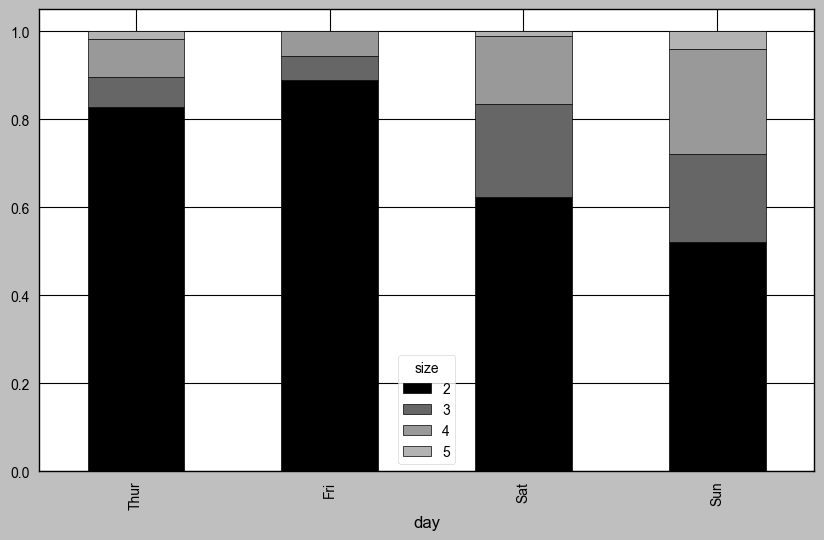

In [178]:
party_pcts.plot.bar(stacked=True)

So you can see that party sizes appear to increase on the weekend in this dataset.

With data that requires aggregation or summarization before making a plot, using the
seaborn package can make things much simpler. 

Let’s look now at the tipping percentage by day with seaborn

In [179]:
plt.close("all")

In [180]:
import seaborn as sns

tips["tip_pct"] = tips["tip"] / (tips["total_bill"] - tips["tip"])
tips.head()

,total_bill,tip,smoker,day,time,size,tip_pct
0,16.99,1.01,No,Sun,Dinner,2,0.063204
1,10.34,1.66,No,Sun,Dinner,3,0.191244
2,21.01,3.50,No,Sun,Dinner,3,0.199886
3,23.68,3.31,No,Sun,Dinner,2,0.162494
4,24.59,3.61,No,Sun,Dinner,4,0.172069


<Axes: xlabel='tip_pct', ylabel='day'>

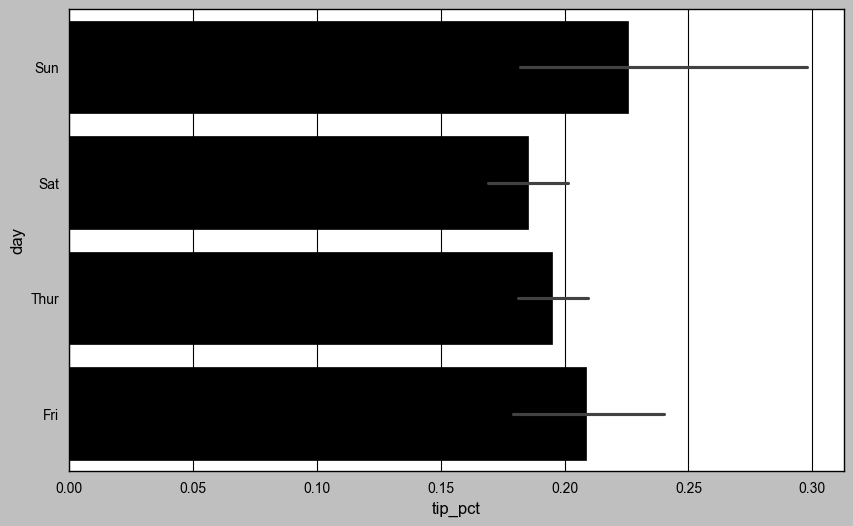

In [181]:
sns.barplot(x="tip_pct", y="day", data=tips, orient="h")

Plotting functions in seaborn take a data argument, which can be a pandas DataFrame. 
The other arguments refer to column names. Because there are multiple
observations for each value in the day, the **bars are the average value of tip_pct**.
The **black lines** drawn on the bars represent the 95% confidence interval (this can be
configured through optional arguments).


In statistics, a 95% confidence interval represents an interval within which the true mean value is expected to fall with 95% probability, based on the sample.

In [182]:
plt.close("all")

`seaborn.barplot` has a `hue` option that enables us to split by an additional categorical
value

<Axes: xlabel='tip_pct', ylabel='day'>

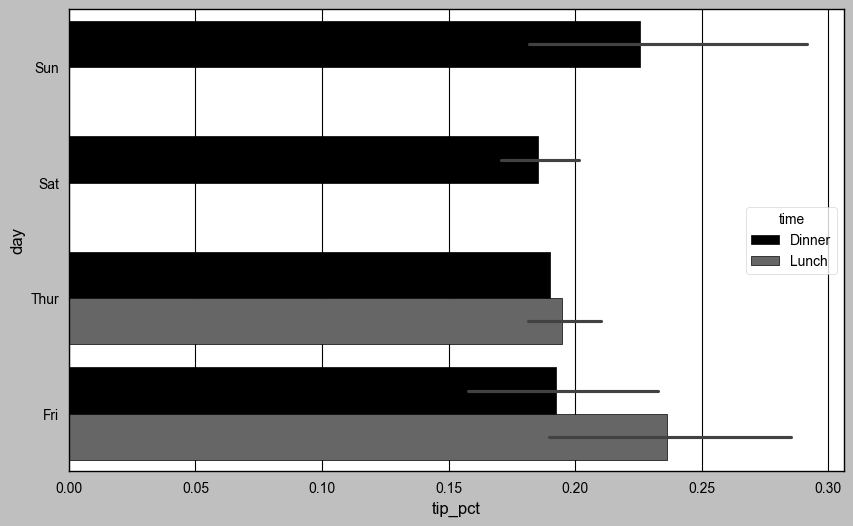

In [183]:
sns.barplot(x="tip_pct", y="day", hue="time", data=tips, orient="h")

In [184]:
plt.close("all")

Notice that seaborn has automatically changed the aesthetics of plots: the default
color palette, plot background, and grid line colors. You can switch between different
plot appearances using `seaborn.set_style`

<Axes: xlabel='tip_pct', ylabel='day'>

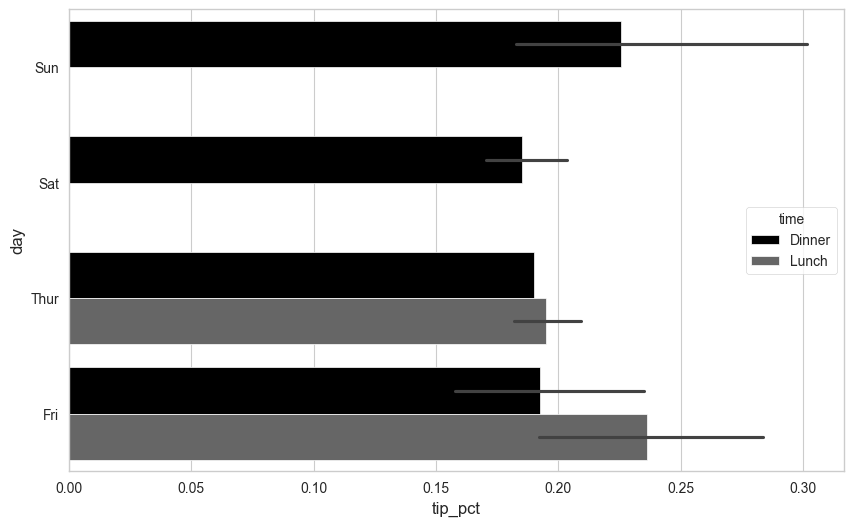

In [185]:
sns.set_style("whitegrid")
sns.barplot(x="tip_pct", y="day", hue="time", data=tips, orient="h")


### Histograms and Density Plots
A **histogram** is a kind of bar plot that gives a *discretized* display of value frequency.
The data points are split into discrete, evenly spaced bins, and the number of data
points in each bin is plotted. 

Using the tipping data from before, we can make a
histogram of tip percentages of the total bill using the `plot.hist` method on the
Series

<Axes: ylabel='Frequency'>

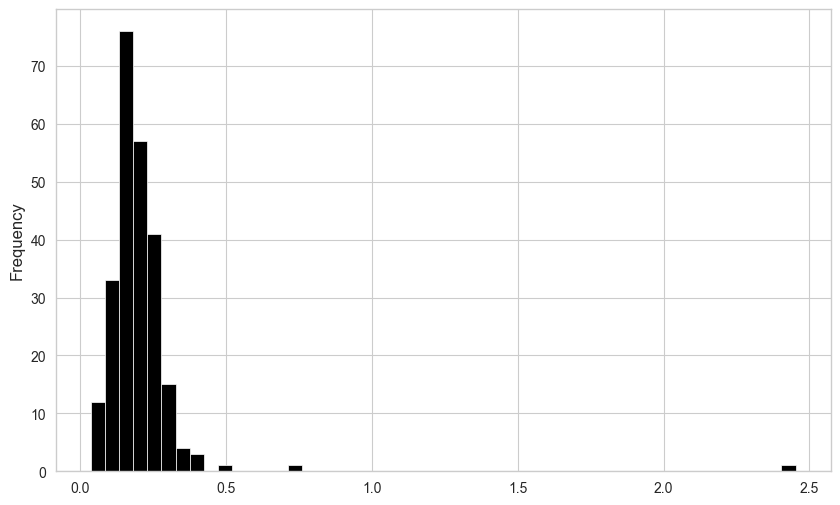

In [186]:
tips["tip_pct"].plot.hist(bins=50)

A related plot type is a **density plot**, which is formed by computing an estimate of a
continuous probability distribution that might have generated the observed data. 

The usual procedure is to approximate this distribution as a mixture of “kernels”—that is,
simpler distributions like the normal distribution. Thus, density plots are also known
as kernel density estimate (KDE) plots. 

Using `plot.density` makes a density plot
using the conventional mixture-of-normals estimate

<Axes: ylabel='Density'>

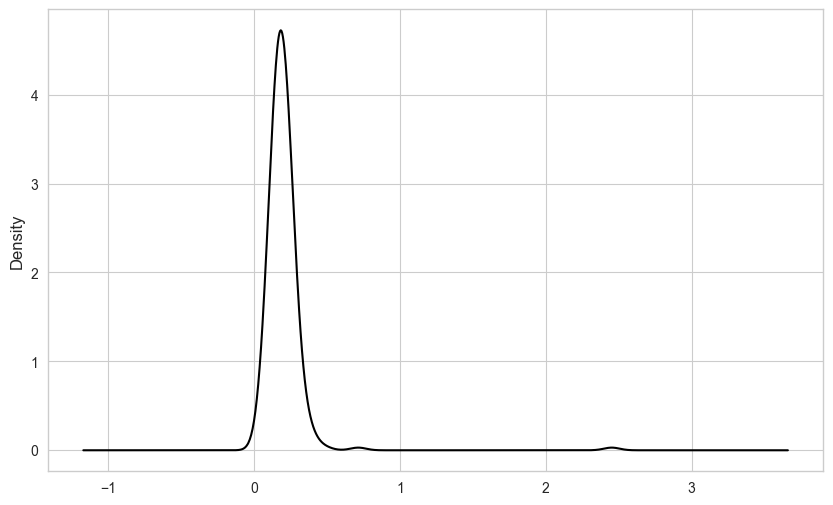

In [196]:
tips["tip_pct"].plot.density()

This kind of plot requires SciPy, so if you do not have it installed already, you can
pause and do that now.

seaborn makes histograms and density plots even easier through its `histplot`
method, which can plot both a histogram and a continuous density estimate simultaneously.

As an example, consider a bimodal distribution consisting of draws from
two different standard normal distribution

<Axes: ylabel='Count'>

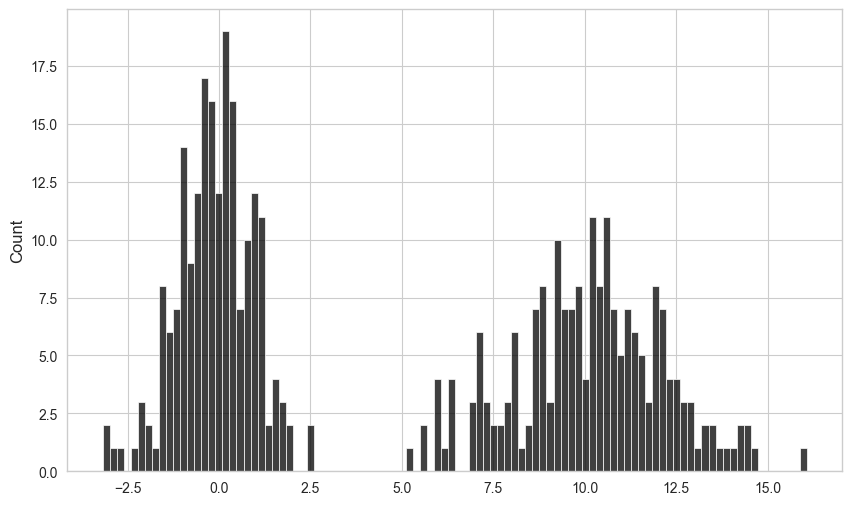

In [188]:
comp1 = np.random.standard_normal(200)
comp2 = 10 + 2 * np.random.standard_normal(200)
values = pd.Series(np.concatenate([comp1, comp2]))

sns.histplot(values, bins=100, color="black")

### Scatter or Point Plots

Point plots or **scatter plots** can be a useful way of examining the relationship between
two one-dimensional data series. For example, here we load the macrodata dataset
from the statsmodels project, select a few variables, then compute log differences

In [197]:
macro = pd.read_csv("examples/macrodata.csv")
macro.head()

,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
0,1959,1,2710.349,1707.4,286.898,470.045,1886.9,28.98,139.7,2.82,5.8,177.146,0.00,0.00
1,1959,2,2778.801,1733.7,310.859,481.301,1919.7,29.15,141.7,3.08,5.1,177.830,2.34,0.74
2,1959,3,2775.488,1751.8,289.226,491.260,1916.4,29.35,140.5,3.82,5.3,178.657,2.74,1.09
3,1959,4,2785.204,1753.7,299.356,484.052,1931.3,29.37,140.0,4.33,5.6,179.386,0.27,4.06
4,1960,1,2847.699,1770.5,331.722,462.199,1955.5,29.54,139.6,3.50,5.2,180.007,2.31,1.19


In [190]:
data = macro[["cpi", "m1", "tbilrate", "unemp"]]
trans_data = np.log(data).diff().dropna()
trans_data.tail()

,cpi,m1,tbilrate,unemp
198,-0.007904,0.045361,-0.396881,0.105361
199,-0.021979,0.066753,-2.277267,0.139762
200,0.002340,0.010286,0.606136,0.160343
201,0.008419,0.037461,-0.200671,0.127339
202,0.008894,0.012202,-0.405465,0.042560


We can then use seaborn’s `regplot` method, which makes a scatter plot and fits a linear regression line

Text(0.5, 1.0, 'Changes in log(m1) versus log(unemp)')

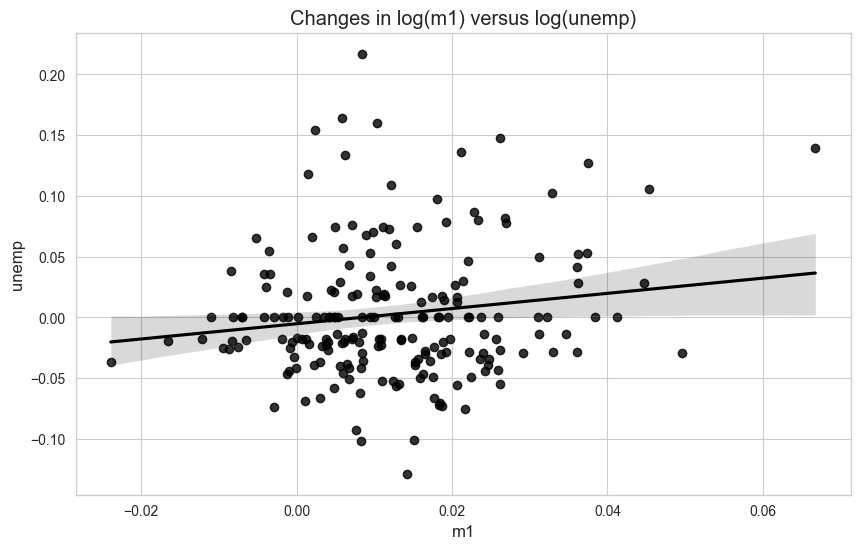

In [191]:
ax = sns.regplot(x="m1", y="unemp", data=trans_data)
ax.set_title("Changes in log(m1) versus log(unemp)")

In exploratory data analysis, it’s helpful to be able to look at all the scatter plots
among a group of variables; this is known as a pairs plot or scatter plot matrix. Making such a plot from scratch is a bit of work, so seaborn has a convenient `pairplot`
function that supports placing histograms or density estimates of each variable along
the diagonal

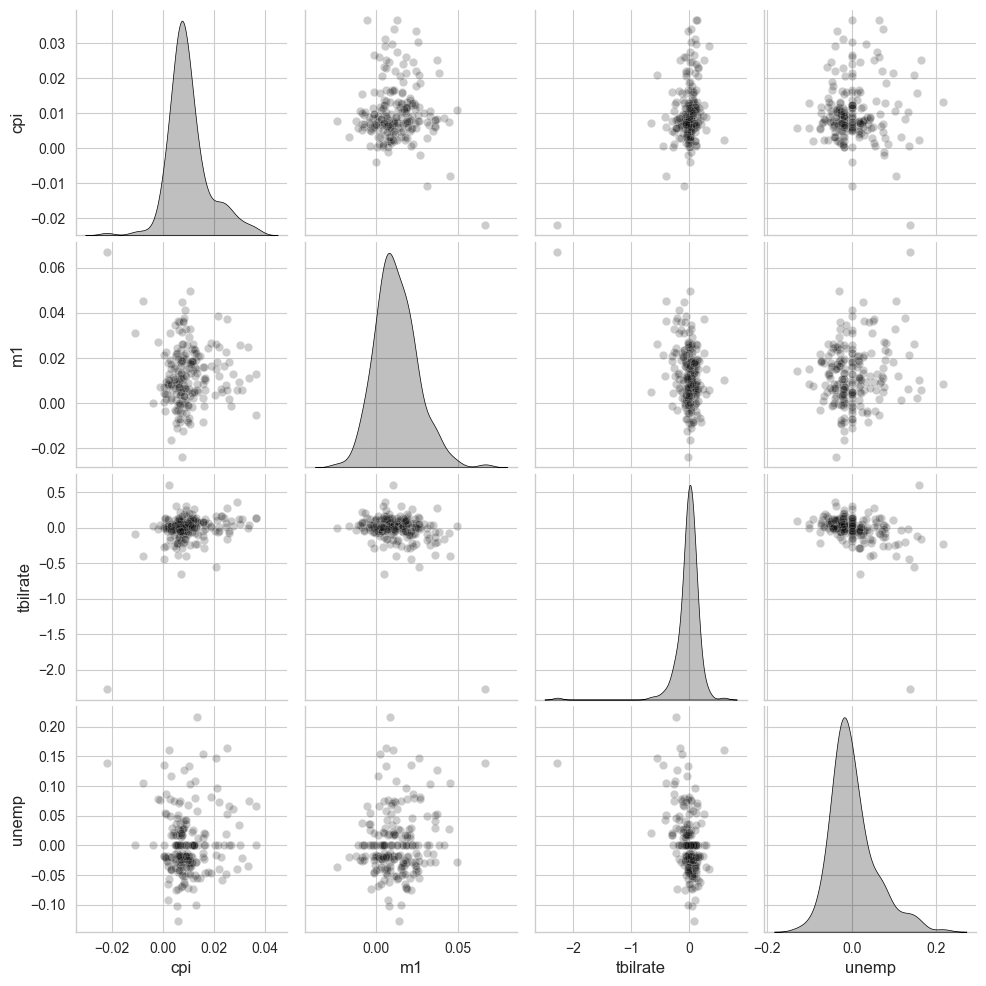

In [192]:
# plot_kws enables us to pass down configuration options to the individual plotting calls on the off-diagonal elements
sns.pairplot(trans_data, diag_kind="kde", plot_kws={"alpha": 0.2})

### Facet Grids and Categorical Data
What about datasets where we have additional grouping dimensions? One way to
visualize data with many **categorical variables** is to use a **facet grid**, which is a two-dimensional layout of plots where the data is split across the plots on each axis based
on the distinct values of a certain variable. seaborn has a useful built-in function `catplot` that simplifies making many kinds of faceted plots split by categorical 

**Facet plots**, also known as **trellis plots** or small multiples, are figures made up of multiple subplots which have the same set of axes, where each subplot shows a subset of the data

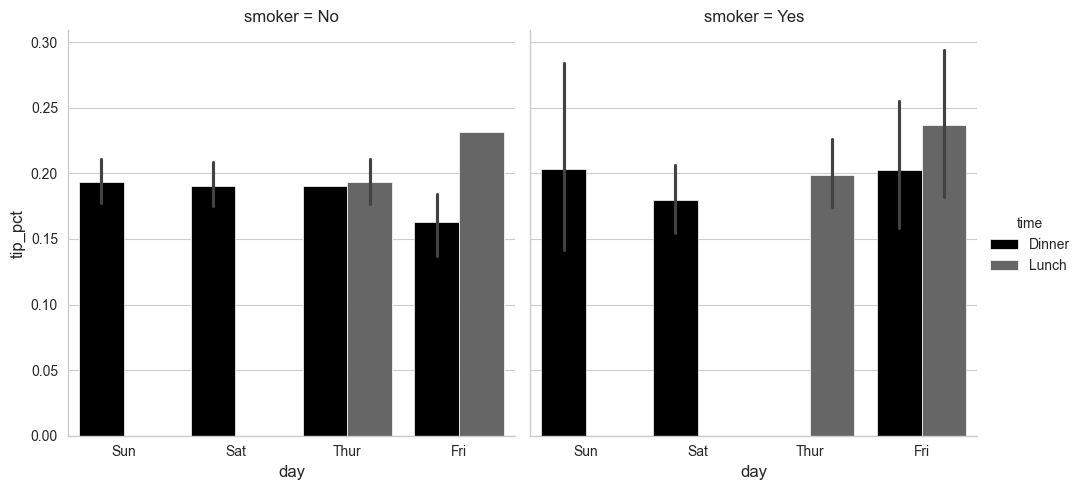

In [193]:
sns.catplot(x="day", y="tip_pct", hue="time", col="smoker",
            kind="bar", data=tips[tips.tip_pct < 1])

Instead of grouping by "time" by different bar colors within a facet, we can also
expand the facet grid by adding one row per time value

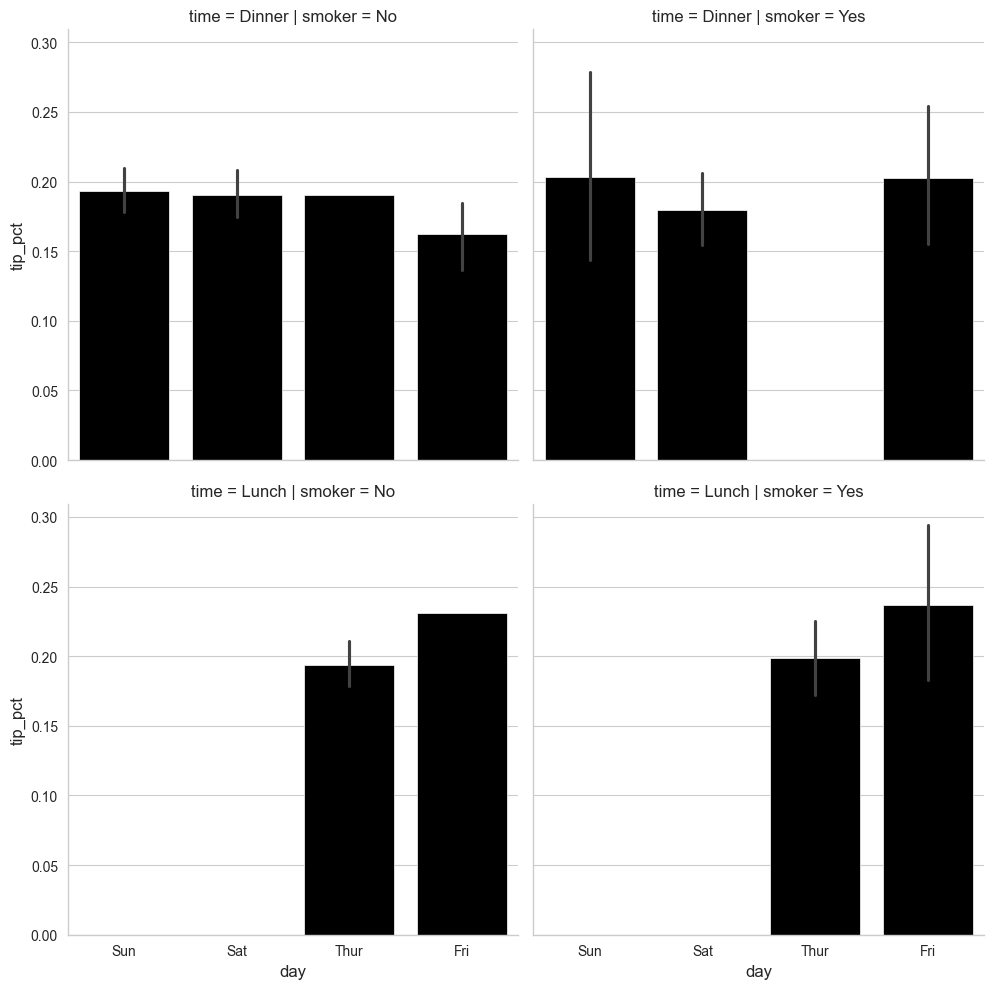

In [194]:
sns.catplot(x="day", y="tip_pct", row="time",
            col="smoker",
            kind="bar", data=tips[tips.tip_pct < 1])

`catplot` supports other plot types that may be useful depending on what you are
trying to display. 

For example, **box plots** or **box-and-whisker plot** (which show the median, quartiles, and
outliers) can be an effective visualization type

The **box** shows the quartiles of the dataset while the **whiskers** extend to show the rest of the distribution, except for points that are determined to be **“outliers”** using a method that is a function of the inter-quartile range

<img src="Img/boxplot.webp" alt="Box plot" title="Box plot" />

https://ai.plainenglish.io/interpretation-of-box-plots-ace925c6595 


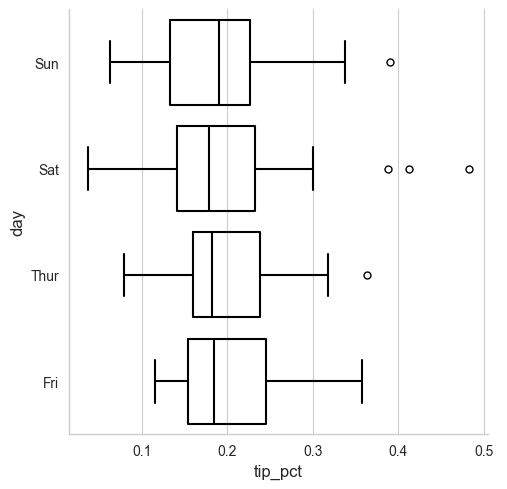

In [199]:
sns.catplot(x="tip_pct", y="day", kind="box",
            data=tips[tips.tip_pct < 0.5], fill=False)

## Other Python Visualization Tools
As is common with open source, there many options for creating graphics in Python
(too many to list). Since 2010, much development effort has been focused on creating
**interactive graphics** for publication on the web. With tools like Altair, Bokeh, and
Plotly, it’s now possible to specify dynamic, interactive graphics in Python that are
intended for use with web browsers.

For creating **static graphics** for print or web, I recommend using matplotlib and
libraries that build on matplotlib, like pandas and seaborn, for your needs. 